In [35]:
import pandas as pd

In [36]:
df=pd.read_csv('/content/mushroom.csv')

In [ ]:
df.shape

(2000, 26)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [ ]:
df.head()

Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 26 columns]

In [ ]:
#checking for missing values
df.isnull().sum()


Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

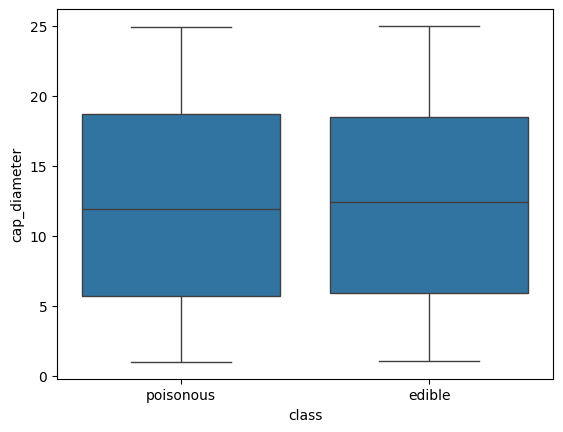

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plotting histograms for all features
df.hist(figsize=(20, 15))
plt.show()

# Example: Box plots for selected features
sns.boxplot(x='class', y='cap_diameter', data=df)
plt.show()


There are no outliers

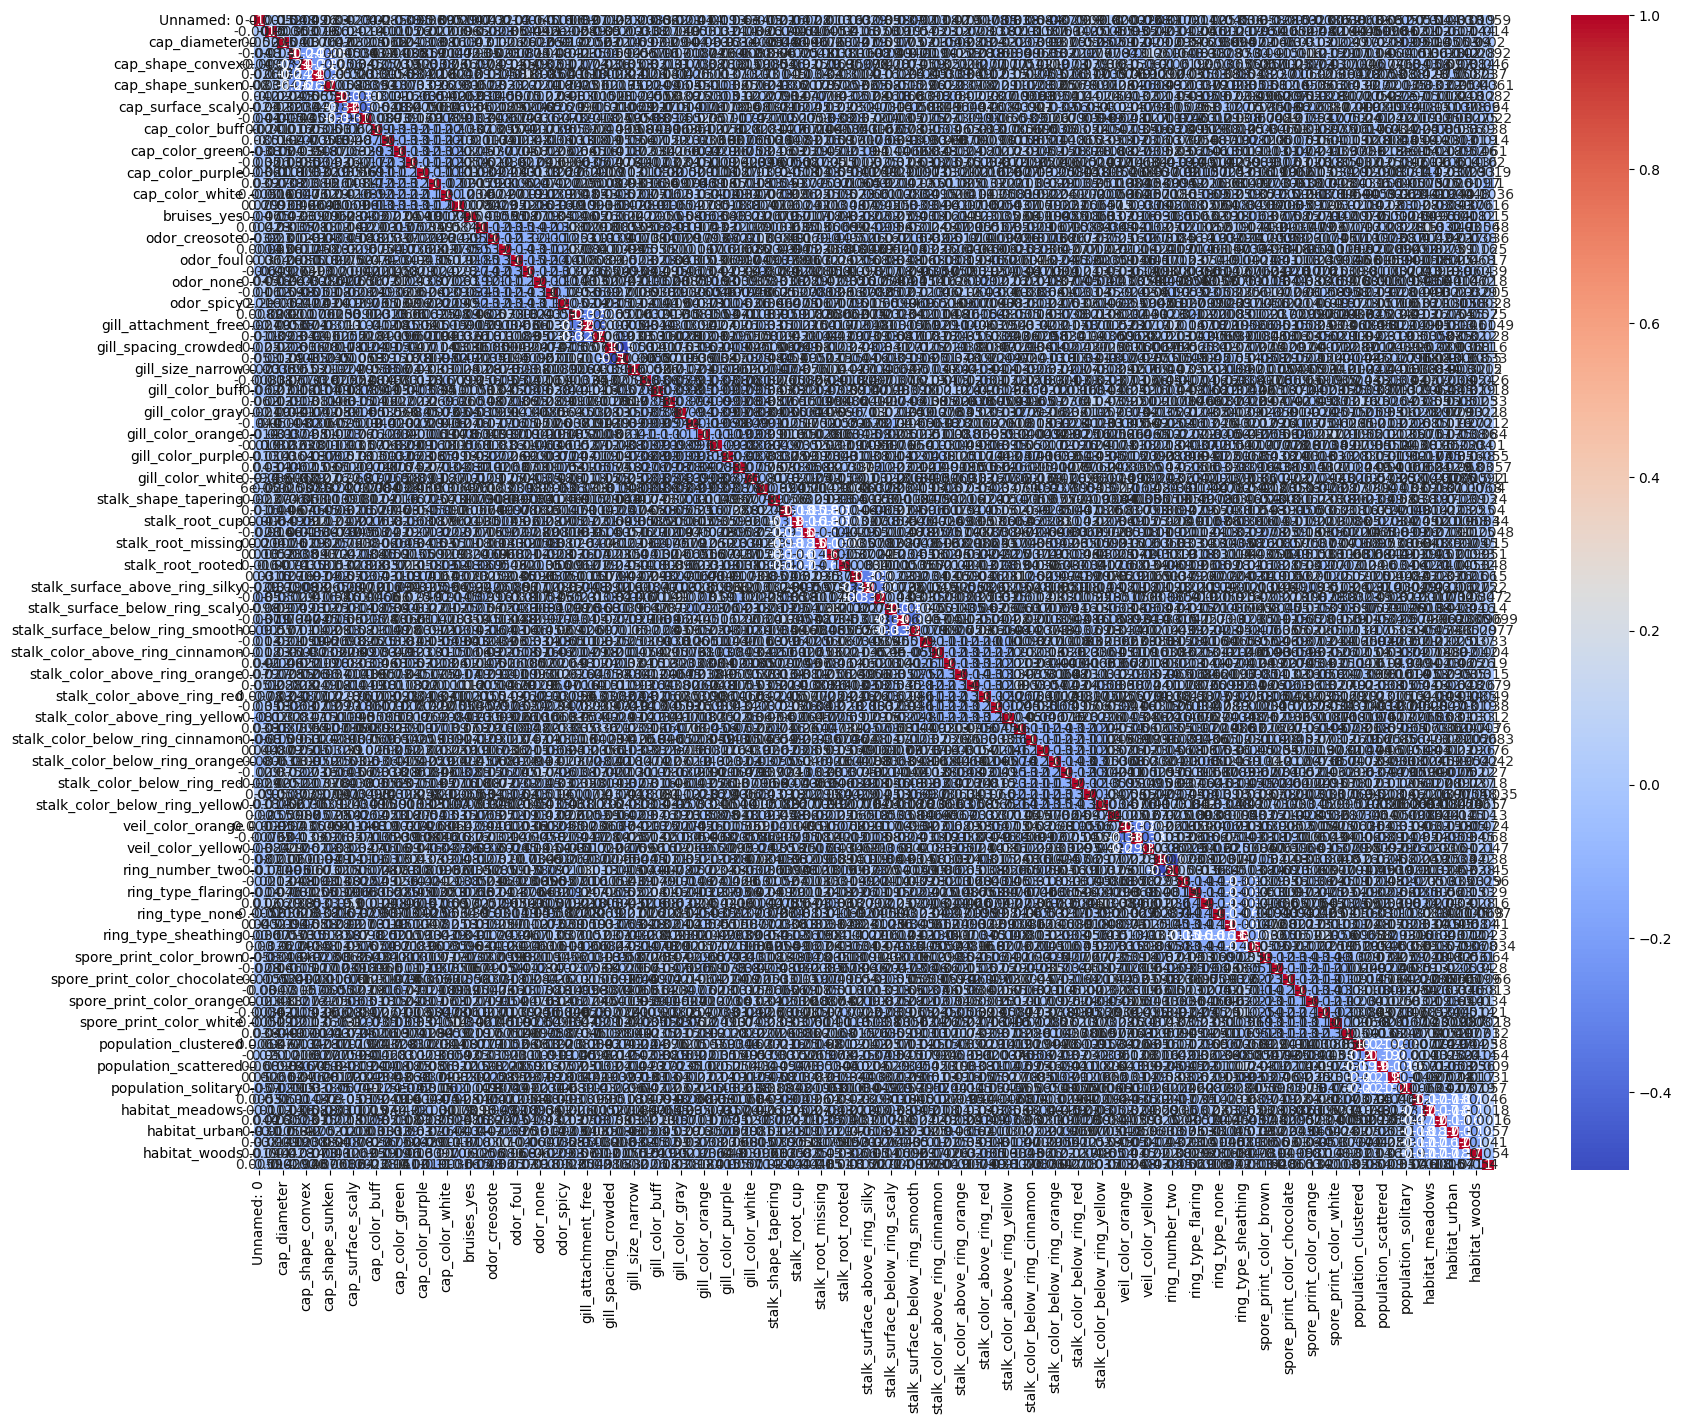

In [ ]:
# Since the dataset is largely categorical, we need to encode it before calculating correlations
df_encoded = pd.get_dummies(df, drop_first=True)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'class' column
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# One-hot encode the other categorical features
df = pd.get_dummies(df, columns=df.columns.drop('class'), drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')


In [ ]:
# Train the SVM model
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8725
Precision: 0.8673469387755102
Recall: 0.9550561797752809
F1 Score: 0.9090909090909092
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       133
           1       0.87      0.96      0.91       267

    accuracy                           0.87       400
   macro avg       0.88      0.83      0.85       400
weighted avg       0.87      0.87      0.87       400



The linear kernel SVM exhibits strong performance with high recall and balanced precision, achieving an overall accuracy of 87.25%.

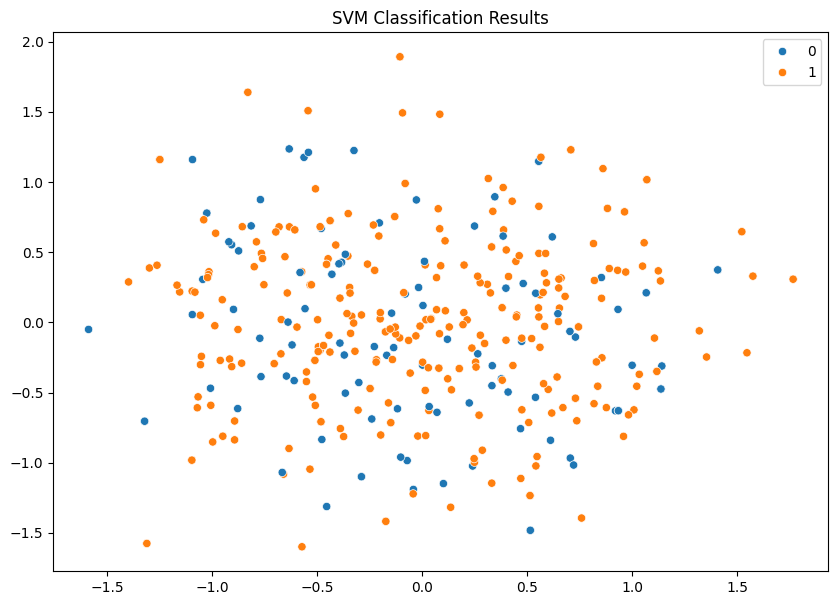

In [38]:
from sklearn.decomposition import PCA

# Reduce the dimensions of the data for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Plot the results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred)
plt.title('SVM Classification Results')
plt.show()


In [40]:
# Train and evaluate SVM with different kernels
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(" ")


Kernel: linear
Accuracy: 0.8725
Precision: 0.8673469387755102
Recall: 0.9550561797752809
F1 Score: 0.9090909090909092
 
Kernel: poly
Accuracy: 0.875
Precision: 0.8488745980707395
Recall: 0.9887640449438202
F1 Score: 0.9134948096885812
 
Kernel: rbf
Accuracy: 0.83
Precision: 0.8042813455657493
Recall: 0.9850187265917603
F1 Score: 0.8855218855218855
 


The linear kernel SVM achieved good overall performance with an accuracy of 87.25% and balanced precision and recall. The polynomial kernel performed slightly better with an accuracy of 87.5% and higher recall but slightly lower precision. The RBF kernel had the lowest accuracy at 83% and highest recall, indicating it captures more true positives but with lower precision compared to the other kernels.